In [8]:
import tensorflow as tf
import pandas as pd
import numpy as np

print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [9]:
df = pd.read_csv("student_study_habits.csv")
df.head()


,study_hours_per_week,sleep_hours_per_day,attendance_percentage,assignments_completed,final_grade,participation_level_Low,participation_level_Medium,internet_access_Yes,parental_education_High School,parental_education_Master's,parental_education_PhD,extracurricular_Yes,part_time_job_Yes
0,0.527230,0.685236,0.993245,0.222222,71.104897,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.421400,0.881883,0.883478,0.555556,62.240021,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.552393,0.220286,0.683469,1.000000,65.268855,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.698283,0.612594,0.520094,0.222222,66.609921,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.405419,0.369871,0.831127,0.333333,58.967484,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0


In [10]:
df.shape

(500, 13)

In [11]:
df.isna().sum()

study_hours_per_week              0
sleep_hours_per_day               0
attendance_percentage             0
assignments_completed             0
final_grade                       0
participation_level_Low           0
participation_level_Medium        0
internet_access_Yes               0
parental_education_High School    0
parental_education_Master's       0
parental_education_PhD            0
extracurricular_Yes               0
part_time_job_Yes                 0
dtype: int64

In [12]:
df.describe()

,study_hours_per_week,sleep_hours_per_day,attendance_percentage,assignments_completed,final_grade,participation_level_Low,participation_level_Medium,internet_access_Yes,parental_education_High School,parental_education_Master's,parental_education_PhD,extracurricular_Yes,part_time_job_Yes
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000
mean,0.445603,0.506387,0.684110,0.533556,63.753071,0.202000,0.484000,0.890000,0.268000,0.228000,0.07800,0.618000,0.316000
std,0.162325,0.194923,0.214918,0.276109,7.114183,0.401894,0.500244,0.313203,0.443361,0.419963,0.26844,0.486363,0.465379
min,0.000000,0.000000,0.000000,0.000000,40.200403,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.327727,0.380942,0.530386,0.333333,58.813933,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.446577,0.505706,0.697383,0.555556,63.822553,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,0.550575,0.630248,0.844194,0.777778,68.588277,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,92.007807,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [13]:
import matplotlib.pyplot as plt

import seaborn as sns

#for col in df:
#    if df[col].dtype != '0':
#        sns.histplot(df[col], kde=True, stat='count')
#        plt.show()

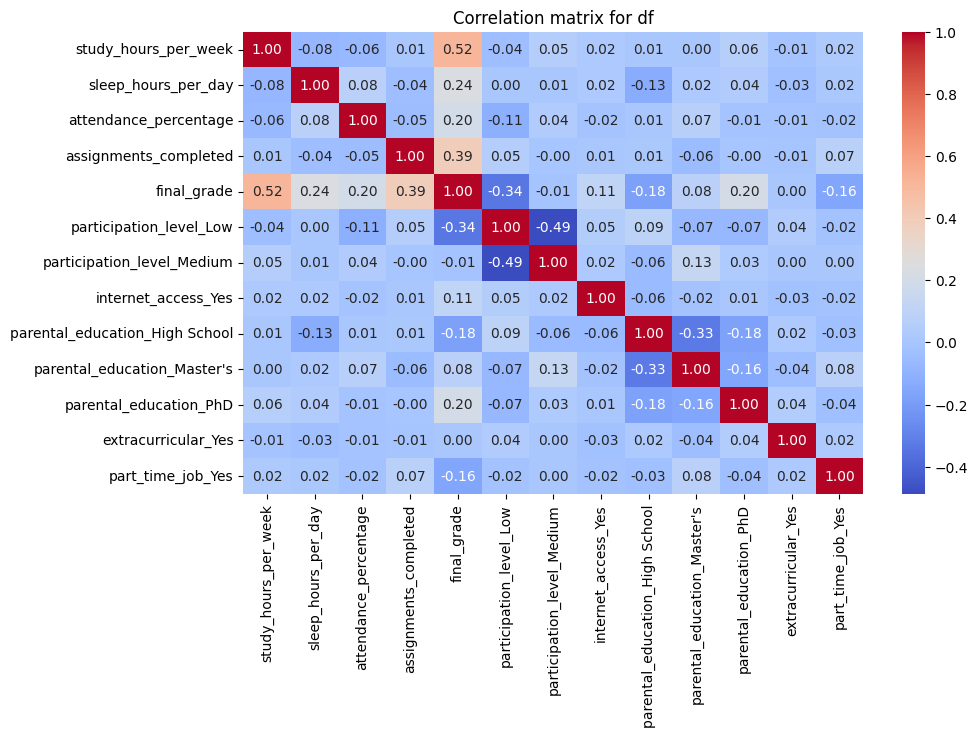

In [14]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation matrix for df")
plt.show()

In [15]:
df['final_grade']

0      71.104897
1      62.240021
2      65.268855
3      66.609921
4      58.967484
         ...    
495    67.032033
496    57.419677
497    74.950594
498    55.271003
499    60.375414
Name: final_grade, Length: 500, dtype: float64

In [16]:
df = df.drop(axis=1, columns=['participation_level_Medium', 'participation_level_Low', 'parental_education_High School', 'part_time_job_Yes','parental_education_PhD'])

In [17]:
df['final_grade'] = df['final_grade'].apply(lambda x: 
                                                    1 if x >= 90 else
                                                    2 if x >= 80 else
                                                    3 if x >= 70 else
                                                    4 if x >= 60 else
                                                    5)



In [18]:
df['final_grade'].value_counts()

final_grade
4    247
5    162
3     82
2      8
1      1
Name: count, dtype: int64

In [19]:
df.describe()

,study_hours_per_week,sleep_hours_per_day,attendance_percentage,assignments_completed,final_grade,internet_access_Yes,parental_education_Master's,extracurricular_Yes
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.445603,0.506387,0.684110,0.533556,4.122000,0.890000,0.228000,0.618000
std,0.162325,0.194923,0.214918,0.276109,0.745807,0.313203,0.419963,0.486363
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.327727,0.380942,0.530386,0.333333,4.000000,1.000000,0.000000,0.000000
50%,0.446577,0.505706,0.697383,0.555556,4.000000,1.000000,0.000000,1.000000
75%,0.550575,0.630248,0.844194,0.777778,5.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000


In [20]:
df['final_grade'].value_counts()

final_grade
4    247
5    162
3     82
2      8
1      1
Name: count, dtype: int64

In [21]:
X = df.drop('final_grade', axis=1)
y = df['final_grade']

In [22]:
X.shape

(500, 7)

In [23]:
y.shape

(500,)

In [24]:
df.dtypes

study_hours_per_week           float64
sleep_hours_per_day            float64
attendance_percentage          float64
assignments_completed          float64
final_grade                      int64
internet_access_Yes            float64
parental_education_Master's    float64
extracurricular_Yes            float64
dtype: object

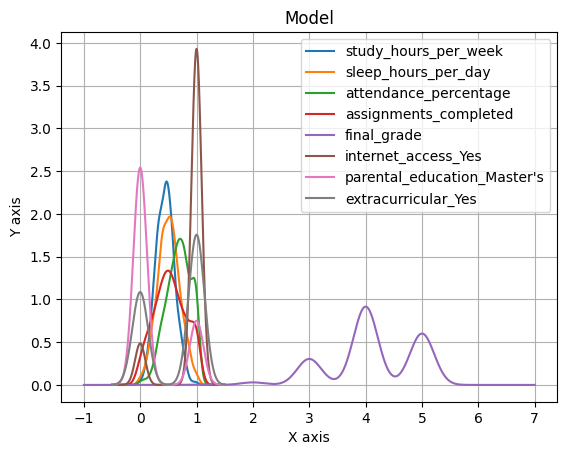

In [25]:

df.plot(kind='kde')
plt.title('Model')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.grid(True)

plt.show()

## Logistic Regression

Accuracy for Logistic regression 0.64
F1 macro: 0.4394738994139294
F1 weighted: 0.6390053155240561
Classification report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.50      0.50      0.50         2
           3       0.33      0.40      0.36        10
           4       0.71      0.72      0.71        57
           5       0.64      0.60      0.62        30

    accuracy                           0.64       100
   macro avg       0.44      0.44      0.44       100
weighted avg       0.64      0.64      0.64       100



/Users/luisgonzalez/miniconda3/envs/tf/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/luisgonzalez/miniconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/luisgonzalez/miniconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result

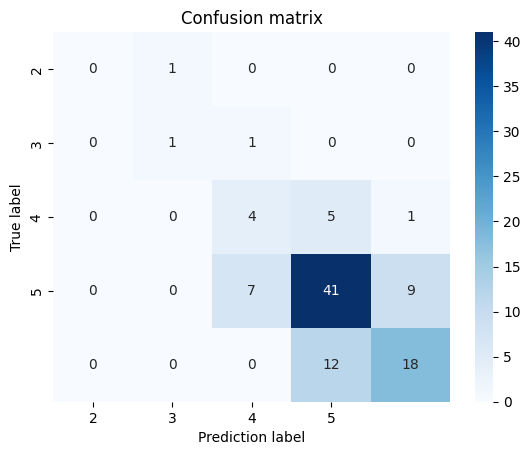

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LogisticRegression(solver='lbfgs', multi_class='multinomial' ,random_state=42, max_iter=500)


scale = StandardScaler()

x_train_scale = scale.fit_transform(X_train)
x_test_scale = scale.transform(X_test)


lr.fit(x_train_scale, y_train)


lr_y_pred = lr.predict(x_test_scale)

lr_accuracy = accuracy_score(y_test, lr_y_pred)

print(f"Accuracy for Logistic regression {lr_accuracy}")



f1_macro = f1_score(y_test, lr_y_pred, average='macro')
f1_weighted = f1_score(y_test, lr_y_pred, average='weighted')


print(f"F1 macro: {f1_macro}")
print(f"F1 weighted: {f1_weighted}")


print("Classification report")
print(classification_report(y_test, lr_y_pred))


cm = confusion_matrix(y_test, lr_y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=lr.classes_, yticklabels=lr.classes_)
plt.xlabel("Prediction label")
plt.ylabel("True label")
plt.title("Confusion matrix")
plt.show()


## Random Forest

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=150, criterion='entropy')

rf.fit(X_train, y_train)


rf_y_pred = rf.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f"Accuracy for Random Forest {rf_accuracy}")


Accuracy for Random Forest 0.49333333333333335


## Decision Tree

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


dt = DecisionTreeClassifier(criterion='entropy')


dt.fit(X_train, y_train)


dt_y_pred = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_y_pred)


print(f"Accuracy for Decision Tree {dt_accuracy}")


Accuracy for Decision Tree 0.46


## Adaboost

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scale = StandardScaler()

x_train_scale = scale.fit_transform(X_train)
x_test_scale = scale.transform(X_test)

ada = AdaBoostClassifier(learning_rate=1, algorithm='SAMME')
ada.fit(x_train_scale, y_train)

ada_y_pred = ada.predict(x_test_scale)
ada_accuracy = accuracy_score(y_test, ada_y_pred)


print(f"Accuracy for Adaboost Tree {ada_accuracy}")

Accuracy for Adaboost Tree 0.5133333333333333


## KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scale = StandardScaler()

x_train_scale = scale.fit_transform(X_train)
x_test_scale = scale.transform(X_test)


knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)


knn_y_pred = knn.predict(x_test_scale)
knn_accuracy = accuracy_score(y_test, knn_y_pred)

print(f"Accuracy for KNN {knn_accuracy}")

print(classification_report(y_test, knn_y_pred))



Accuracy for KNN 0.48
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       0.33      0.20      0.25        10
           4       0.66      0.37      0.47        57
           5       0.40      0.83      0.54        30

    accuracy                           0.48       100
   macro avg       0.28      0.28      0.25       100
weighted avg       0.53      0.48      0.46       100



/Users/luisgonzalez/miniconda3/envs/tf/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/luisgonzalez/miniconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/luisgonzalez/miniconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/luisgonzalez/miniconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification